In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from function import *
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
# from sklearn import svm
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix

In [38]:
df = pd.read_csv('data/train_set.csv')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [39]:
label = pd.read_csv('data/lables.csv')
label.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [40]:
df2 = pd.merge(df, label, on='id')
df2.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [42]:
df2.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [43]:
# int(df2['date_recorded'][0][:4])-df2['construction_year'][0] 

In [44]:
# for i in range(len(df2['date_recorded'])):
#     age = int(df2['date_recorded'][i][:4]) - df2['construction_year'][i]
#     df2['well_age'][i] = age

In [45]:
# df2.head()

In [46]:
# df2['construction_year'].value_counts()

In [47]:
df2['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [48]:
#need to fix class imbalance in train data

In [49]:
continous_var = df2.select_dtypes(exclude='object').columns
list(continous_var)

['id',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

In [62]:
# fig, ax = plt.subplots(figsize=(10,10))
# sns.scatterplot(x=df2['longitude'],y=df2['latitude'], hue=df2['status_group'], ax=ax)

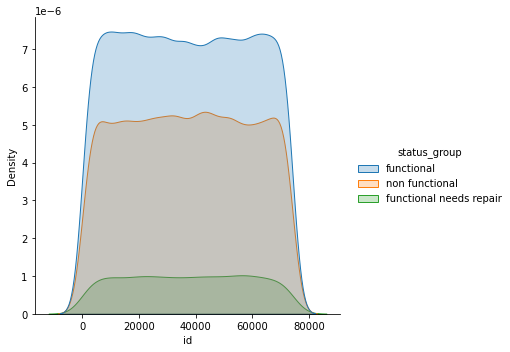

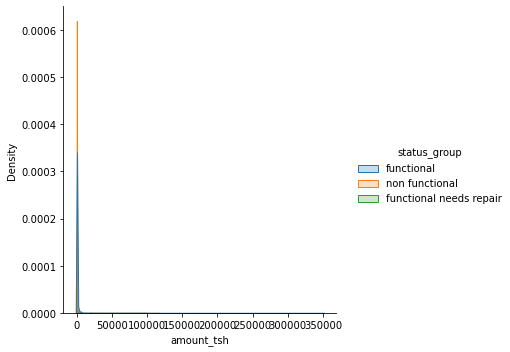

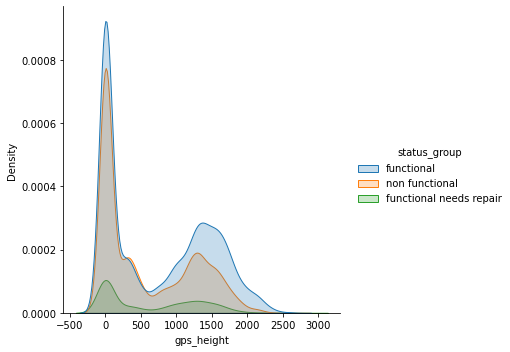

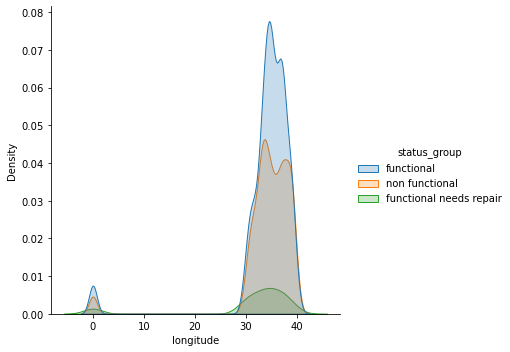

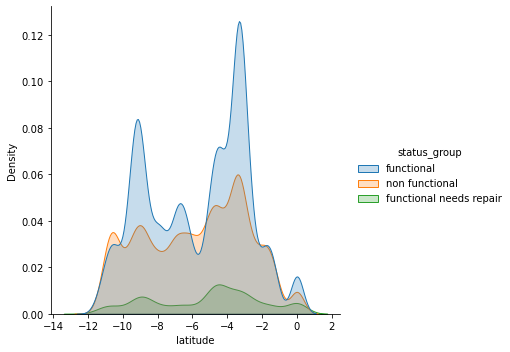

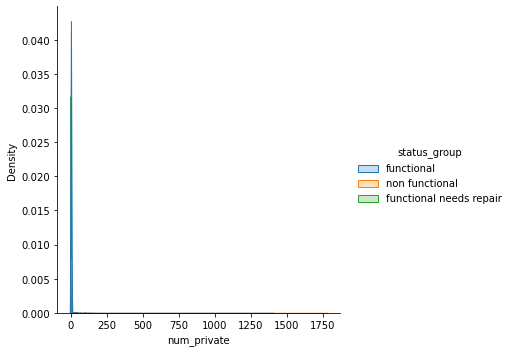

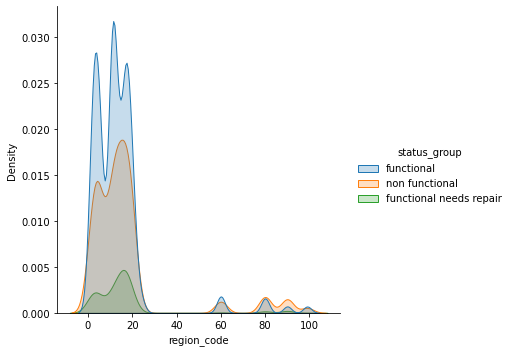

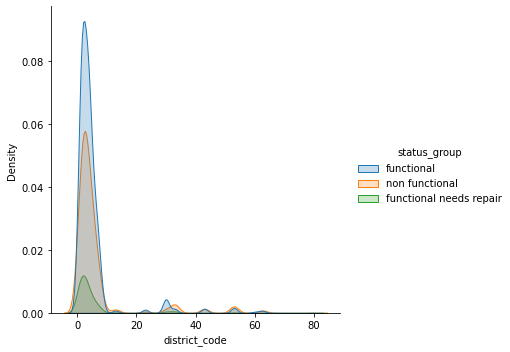

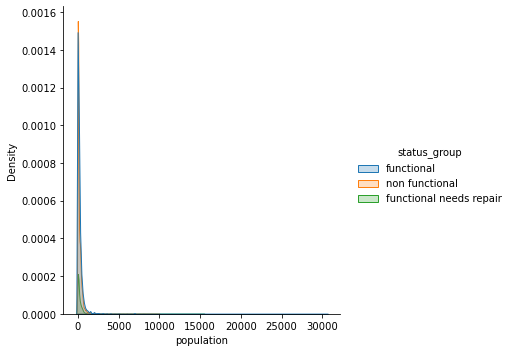

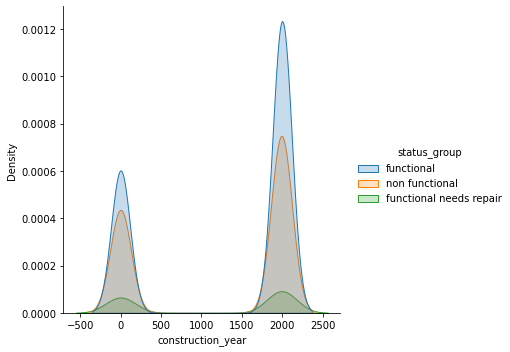

In [63]:
for column in continous_var:
    sns.displot(data=df2, x=column, hue=df2['status_group'], kind='kde', fill=True)
    plt.show()

In [64]:
categorical_var = df2.drop(columns=continous_var)
remove_ = ['date_recorded','funder','installer','wpt_name','subvillage',
                              'lga','ward','scheme_name']
categorical_var.drop(columns=remove_, axis=1, inplace=True)
categorical_var.head()

,basin,region,public_meeting,recorded_by,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,Lake Nyasa,Iringa,True,GeoData Consultants Ltd,VWC,False,gravity,gravity,gravity,vwc,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,Lake Victoria,Mara,NaN,GeoData Consultants Ltd,Other,True,gravity,gravity,gravity,wug,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,Pangani,Manyara,True,GeoData Consultants Ltd,VWC,True,gravity,gravity,gravity,vwc,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,Ruvuma / Southern Coast,Mtwara,True,GeoData Consultants Ltd,VWC,True,submersible,submersible,submersible,vwc,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,Lake Victoria,Kagera,True,GeoData Consultants Ltd,NaN,True,gravity,gravity,gravity,other,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [65]:
# df2['funder'].value_counts()

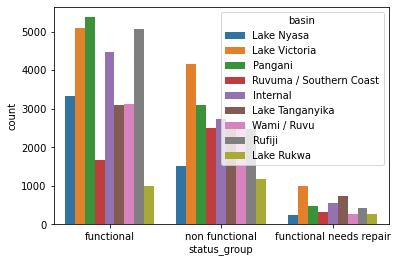

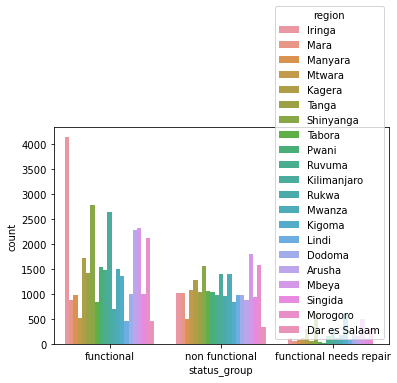

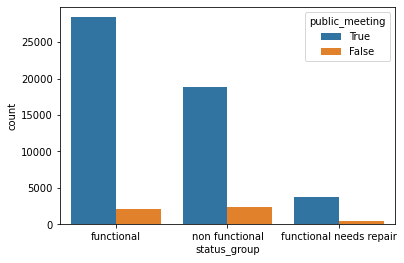

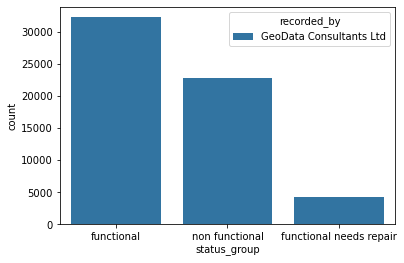

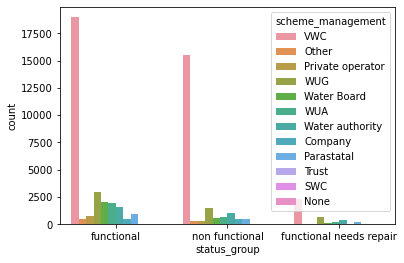

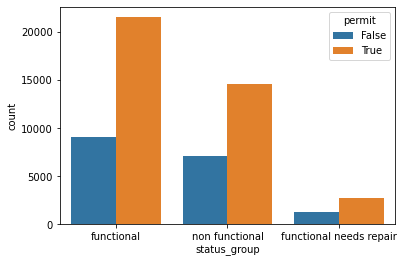

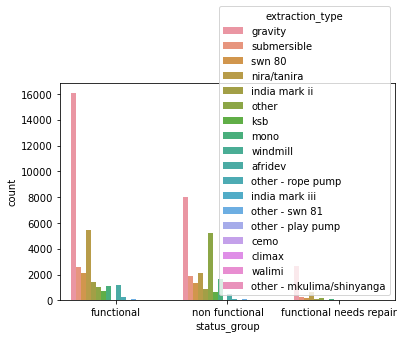

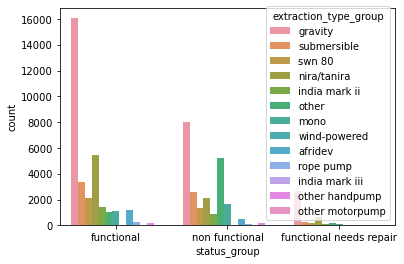

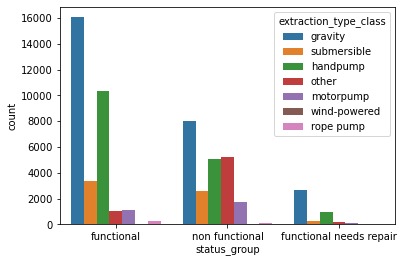

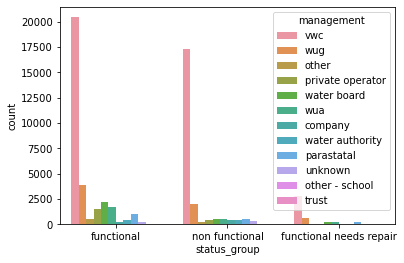

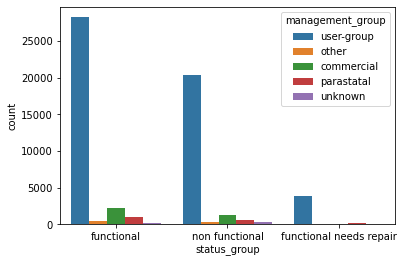

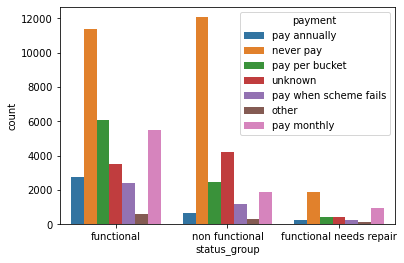

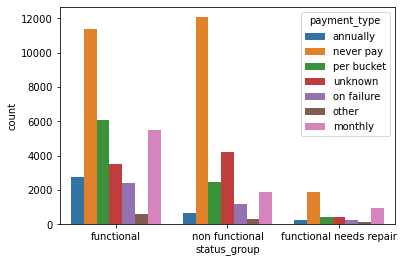

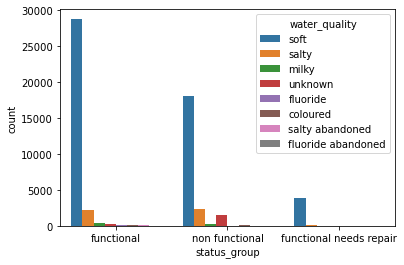

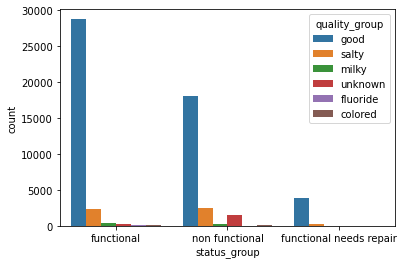

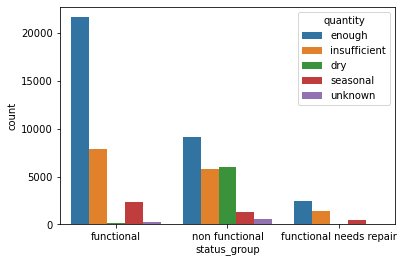

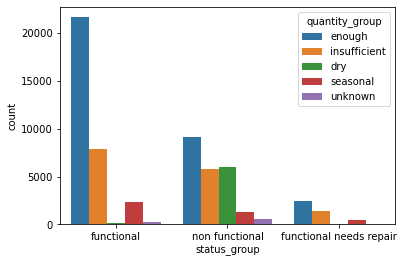

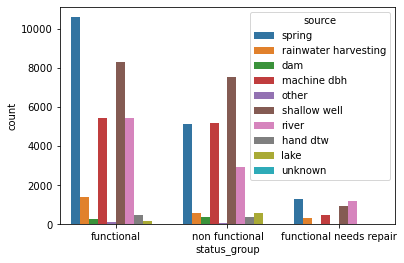

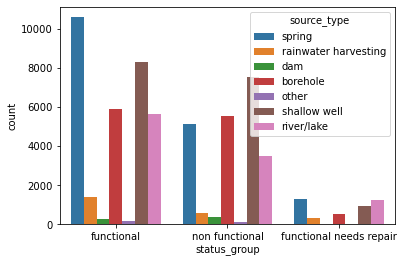

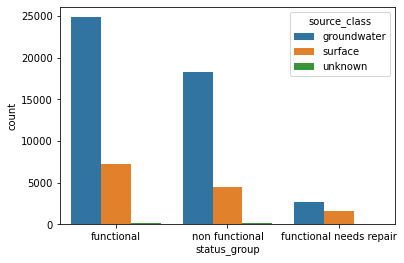

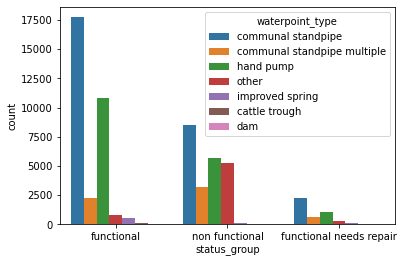

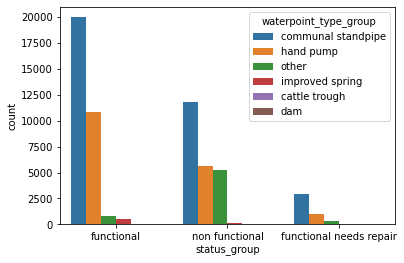

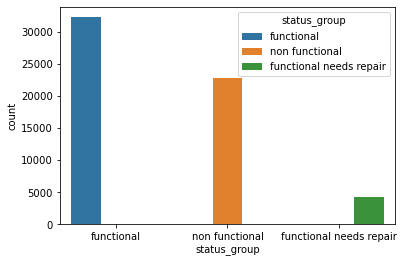

In [66]:
for column in categorical_var.columns:
    sns.countplot(data=df2, x=df2['status_group'], hue=column)
    plt.show()

In [67]:
remove_.extend(continous_var)
remove_.append('recorded_by')
remove_

['date_recorded',
 'funder',
 'installer',
 'wpt_name',
 'subvillage',
 'lga',
 'ward',
 'scheme_name',
 'id',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'recorded_by']

In [68]:
train = df2.drop(columns=remove_ , axis=1)
train.head()

,basin,region,public_meeting,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,Lake Nyasa,Iringa,True,VWC,False,gravity,gravity,gravity,vwc,user-group,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,Lake Victoria,Mara,NaN,Other,True,gravity,gravity,gravity,wug,user-group,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,Pangani,Manyara,True,VWC,True,gravity,gravity,gravity,vwc,user-group,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,Ruvuma / Southern Coast,Mtwara,True,VWC,True,submersible,submersible,submersible,vwc,user-group,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,Lake Victoria,Kagera,True,NaN,True,gravity,gravity,gravity,other,other,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [69]:
train.isna().sum()

basin                       0
region                      0
public_meeting           3334
scheme_management        3877
permit                   3056
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_group              0
source                      0
source_type                 0
source_class                0
waterpoint_type             0
waterpoint_type_group       0
status_group                0
dtype: int64

In [70]:
train['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [71]:
train['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [72]:
train = train.dropna()
train

,basin,region,public_meeting,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,Lake Nyasa,Iringa,True,VWC,False,gravity,gravity,gravity,vwc,user-group,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,Pangani,Manyara,True,VWC,True,gravity,gravity,gravity,vwc,user-group,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,Ruvuma / Southern Coast,Mtwara,True,VWC,True,submersible,submersible,submersible,vwc,user-group,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
5,Pangani,Tanga,True,VWC,True,submersible,submersible,submersible,vwc,user-group,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,Internal,Shinyanga,True,VWC,True,swn 80,swn 80,handpump,vwc,user-group,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,Pangani,Kilimanjaro,True,Water Board,True,gravity,gravity,gravity,water board,user-group,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,Rufiji,Iringa,True,VWC,True,gravity,gravity,gravity,vwc,user-group,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,Rufiji,Mbeya,True,VWC,False,swn 80,swn 80,handpump,vwc,user-group,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,Rufiji,Dodoma,True,VWC,True,nira/tanira,nira/tanira,handpump,vwc,user-group,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [73]:
train.isna().sum()

basin                    0
region                   0
public_meeting           0
scheme_management        0
permit                   0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
status_group             0
dtype: int64

In [74]:
train['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [75]:
train['status_group'] = train['status_group'].map({'functional': 0, 'non functional': 1,
                                                   'functional needs repair': 2})
train.head()

,basin,region,public_meeting,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,Lake Nyasa,Iringa,True,VWC,False,gravity,gravity,gravity,vwc,user-group,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
2,Pangani,Manyara,True,VWC,True,gravity,gravity,gravity,vwc,user-group,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0
3,Ruvuma / Southern Coast,Mtwara,True,VWC,True,submersible,submersible,submersible,vwc,user-group,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
5,Pangani,Tanga,True,VWC,True,submersible,submersible,submersible,vwc,user-group,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,0
6,Internal,Shinyanga,True,VWC,True,swn 80,swn 80,handpump,vwc,user-group,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,1


In [76]:
X = train.drop(columns=['status_group'], axis=1)
y = train['status_group']

In [77]:
X = pd.get_dummies(X)
X

,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,...,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
59396,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
59397,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
59398,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [79]:
# imputer = KNNImputer(n_neighbors=2)
# imputer.fit_transform(X_train)

Classification report for training data:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87     21876
           1       0.89      0.77      0.82     15020
           2       0.71      0.37      0.49      2976

    accuracy                           0.83     39872
   macro avg       0.80      0.69      0.73     39872
weighted avg       0.83      0.83      0.82     39872

Classification report for testing data:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      5505
           1       0.81      0.71      0.75      3771
           2       0.48      0.27      0.35       693

    accuracy                           0.78      9969
   macro avg       0.69      0.62      0.64      9969
weighted avg       0.77      0.78      0.77      9969

Confusion Matrix Train:


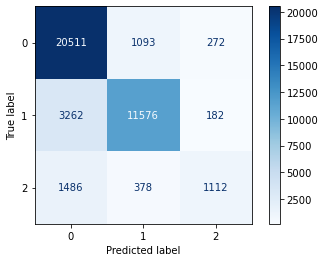

Confusion Matrix Test:


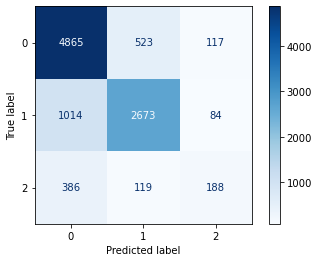

DecisionTreeClassifier()

In [80]:
d_tree = DecisionTreeClassifier(criterion='gini')
class_model(d_tree, X_train, X_test, y_train, y_test)

Classification report for training data:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87     21876
           1       0.88      0.78      0.83     15020
           2       0.69      0.40      0.50      2976

    accuracy                           0.83     39872
   macro avg       0.79      0.70      0.73     39872
weighted avg       0.83      0.83      0.83     39872

Classification report for testing data:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      5505
           1       0.81      0.73      0.76      3771
           2       0.50      0.27      0.35       693

    accuracy                           0.78      9969
   macro avg       0.70      0.63      0.65      9969
weighted avg       0.77      0.78      0.77      9969

Confusion Matrix Train:


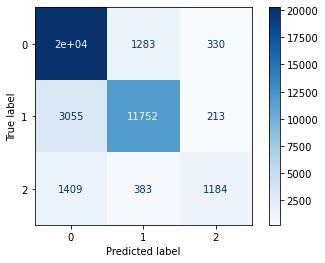

Confusion Matrix Test:


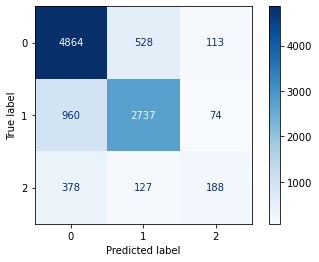

RandomForestClassifier()

In [81]:
rforest = RandomForestClassifier()
class_model(rforest, X_train, X_test, y_train, y_test)

Classification report for training data:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81     21876
           1       0.85      0.60      0.71     15020
           2       0.59      0.12      0.19      2976

    accuracy                           0.75     39872
   macro avg       0.72      0.55      0.57     39872
weighted avg       0.76      0.75      0.73     39872

Classification report for testing data:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81      5505
           1       0.85      0.60      0.70      3771
           2       0.65      0.14      0.23       693

    accuracy                           0.75      9969
   macro avg       0.74      0.56      0.58      9969
weighted avg       0.76      0.75      0.73      9969

Confusion Matrix Train:


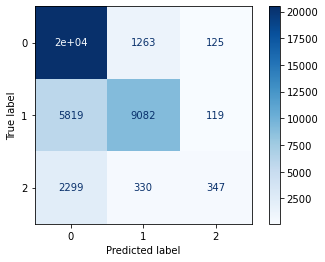

Confusion Matrix Test:


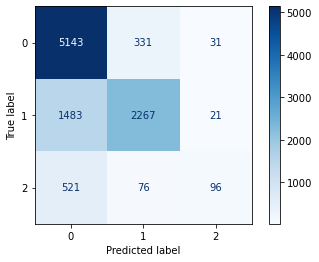

GradientBoostingClassifier(random_state=43)

In [82]:
gboost = GradientBoostingClassifier(random_state=43)
class_model(gboost, X_train, X_test, y_train, y_test)

In [83]:
# svc = svm.SVC()
# class_model(svc, X_train, X_test, y_train, y_test)

Classification report for training data:
              precision    recall  f1-score   support

           0       0.71      0.90      0.80     21876
           1       0.78      0.62      0.70     15020
           2       0.51      0.05      0.08      2976

    accuracy                           0.73     39872
   macro avg       0.67      0.52      0.53     39872
weighted avg       0.72      0.73      0.71     39872

Classification report for testing data:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80      5505
           1       0.78      0.63      0.70      3771
           2       0.60      0.06      0.11       693

    accuracy                           0.74      9969
   macro avg       0.70      0.53      0.54      9969
weighted avg       0.74      0.74      0.71      9969

Confusion Matrix Train:


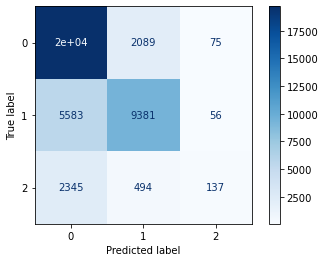

Confusion Matrix Test:


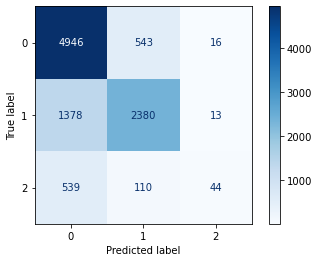

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [84]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
class_model(logreg, X_train, X_test, y_train, y_test)

decision tree and random forest model were best models out of the 4 tested - will proceed w gridsearch but first will try to solve class imbalnce 

In [85]:
#SMOTE/need to solve class imbalance - function is too high and ftnal needs repair is too small
smote = SMOTE()
X_train_resmapled, y_train_resampled = smote.fit_sample(X_train, y_train)
print(pd.Series(y_train_resampled).value_counts()) 

2    21876
1    21876
0    21876
Name: status_group, dtype: int64


Classification report for training data:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     21876
           1       0.90      0.78      0.84     21876
           2       0.80      0.92      0.85     21876

    accuracy                           0.83     65628
   macro avg       0.84      0.83      0.83     65628
weighted avg       0.84      0.83      0.83     65628

Classification report for testing data:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      5505
           1       0.81      0.69      0.75      3771
           2       0.26      0.63      0.37       693

    accuracy                           0.71      9969
   macro avg       0.62      0.69      0.63      9969
weighted avg       0.77      0.71      0.73      9969

Confusion Matrix Train:


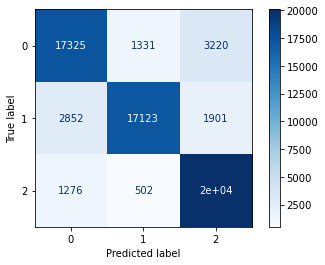

Confusion Matrix Test:


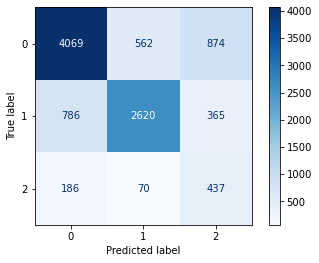

DecisionTreeClassifier()

In [86]:
d_tree_s = DecisionTreeClassifier(criterion='gini')
class_model(d_tree_s, X_train_resmapled, X_test, y_train_resampled, y_test)

Classification report for training data:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80     21876
           1       0.89      0.79      0.84     21876
           2       0.79      0.92      0.85     21876

    accuracy                           0.83     65628
   macro avg       0.84      0.83      0.83     65628
weighted avg       0.84      0.83      0.83     65628

Classification report for testing data:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      5505
           1       0.80      0.71      0.75      3771
           2       0.26      0.63      0.37       693

    accuracy                           0.72      9969
   macro avg       0.63      0.69      0.63      9969
weighted avg       0.77      0.72      0.74      9969

Confusion Matrix Train:


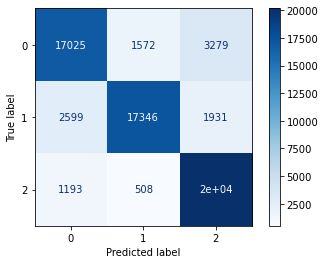

Confusion Matrix Test:


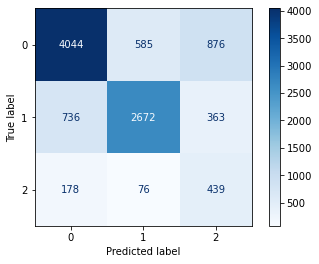

RandomForestClassifier()

In [87]:
rforest_s = RandomForestClassifier()
class_model(rforest_s, X_train_resmapled, X_test, y_train_resampled, y_test)

In [88]:
train.head()

,basin,region,public_meeting,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,Lake Nyasa,Iringa,True,VWC,False,gravity,gravity,gravity,vwc,user-group,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
2,Pangani,Manyara,True,VWC,True,gravity,gravity,gravity,vwc,user-group,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0
3,Ruvuma / Southern Coast,Mtwara,True,VWC,True,submersible,submersible,submersible,vwc,user-group,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
5,Pangani,Tanga,True,VWC,True,submersible,submersible,submersible,vwc,user-group,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,0
6,Internal,Shinyanga,True,VWC,True,swn 80,swn 80,handpump,vwc,user-group,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,1


In [89]:
need_repair = train[train['status_group']==2].index

In [90]:
new_train = train.drop(need_repair)
new_train

,basin,region,public_meeting,scheme_management,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,Lake Nyasa,Iringa,True,VWC,False,gravity,gravity,gravity,vwc,user-group,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
2,Pangani,Manyara,True,VWC,True,gravity,gravity,gravity,vwc,user-group,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0
3,Ruvuma / Southern Coast,Mtwara,True,VWC,True,submersible,submersible,submersible,vwc,user-group,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
5,Pangani,Tanga,True,VWC,True,submersible,submersible,submersible,vwc,user-group,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,0
6,Internal,Shinyanga,True,VWC,True,swn 80,swn 80,handpump,vwc,user-group,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,Pangani,Kilimanjaro,True,Water Board,True,gravity,gravity,gravity,water board,user-group,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
59396,Rufiji,Iringa,True,VWC,True,gravity,gravity,gravity,vwc,user-group,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,0
59397,Rufiji,Mbeya,True,VWC,False,swn 80,swn 80,handpump,vwc,user-group,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,0
59398,Rufiji,Dodoma,True,VWC,True,nira/tanira,nira/tanira,handpump,vwc,user-group,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,0


In [91]:
new_train['status_group'].value_counts(normalize=True)

0    0.593022
1    0.406978
Name: status_group, dtype: float64

In [92]:
X = new_train.drop(columns=['status_group'], axis=1)
y = new_train['status_group']

In [93]:
X = pd.get_dummies(X)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20, random_state=42)

Classification report for training data:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     21837
           1       0.90      0.79      0.84     15100

    accuracy                           0.88     36937
   macro avg       0.88      0.86      0.87     36937
weighted avg       0.88      0.88      0.88     36937

Classification report for testing data:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      5544
           1       0.83      0.73      0.78      3691

    accuracy                           0.83      9235
   macro avg       0.83      0.82      0.82      9235
weighted avg       0.83      0.83      0.83      9235

Confusion Matrix Train:


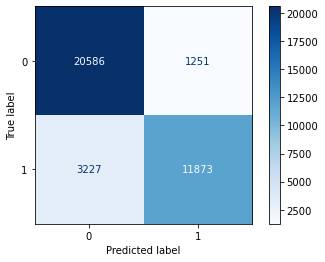

Confusion Matrix Test:


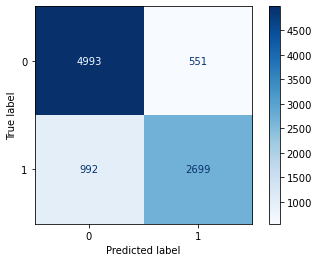

DecisionTreeClassifier()

In [95]:
d_tree = DecisionTreeClassifier(criterion='gini')
class_model(d_tree, X_train, X_test, y_train, y_test)

Classification report for training data:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     21837
           1       0.89      0.80      0.84     15100

    accuracy                           0.88     36937
   macro avg       0.88      0.87      0.87     36937
weighted avg       0.88      0.88      0.88     36937

Classification report for testing data:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      5544
           1       0.83      0.74      0.78      3691

    accuracy                           0.84      9235
   macro avg       0.83      0.82      0.83      9235
weighted avg       0.84      0.84      0.83      9235

Confusion Matrix Train:


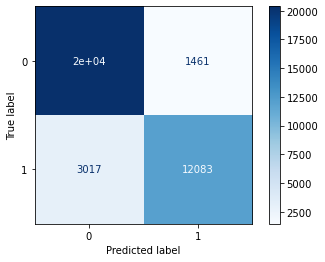

Confusion Matrix Test:


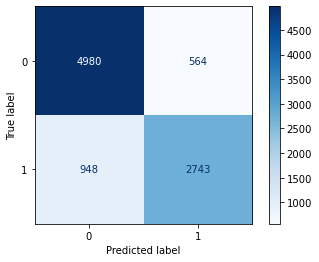

RandomForestClassifier()

In [96]:
rforest = RandomForestClassifier()
class_model(rforest, X_train, X_test, y_train, y_test)

In [56]:
#gridsearch

In [59]:
dt_param_grid = {'criterion': ['gini','entropy'],
                 'max_depth': [None, 2,4,5,6,10],
                 'min_samples_split': [2,5,10],
                 'min_samples_leaf': [1,2,3,4,5,6]
}

In [60]:
dt_grid_search = GridSearchCV(d_tree, dt_param_grid, cv=3, return_train_score=True)
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 5, 6, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [61]:
dt_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

Classification report for training data:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     21837
           1       0.90      0.78      0.83     15100

    accuracy                           0.87     36937
   macro avg       0.88      0.86      0.87     36937
weighted avg       0.88      0.87      0.87     36937

Classification report for testing data:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      5544
           1       0.83      0.73      0.78      3691

    accuracy                           0.83      9235
   macro avg       0.83      0.82      0.82      9235
weighted avg       0.83      0.83      0.83      9235

Confusion Matrix Train:


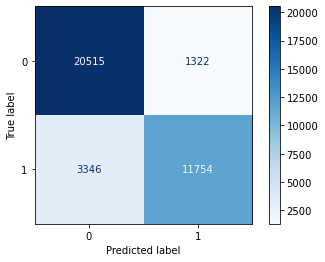

Confusion Matrix Test:


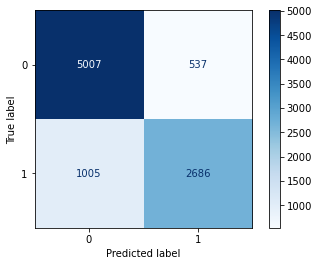

DecisionTreeClassifier(min_samples_split=5)

In [97]:
d_tree1 = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=5)
class_model(d_tree1, X_train, X_test, y_train, y_test)

In [63]:
rf_param_grid = {'max_depth': [None, 2,4,5,6],
                 'n_estimators': [5,10,100, 110],
                 'max_features': ['auto',5,10,20,30]
}

In [64]:
rf_grid_search = GridSearchCV(rforest, rf_param_grid, cv=3, return_train_score=True)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 2, 4, 5, 6],
                         'max_features': ['auto', 5, 10, 20, 30],
                         'n_estimators': [5, 10, 100, 110]},
             return_train_score=True)

In [65]:
rf_grid_search.best_params_

{'max_depth': None, 'max_features': 10, 'n_estimators': 110}

In [66]:
rf_param_grid = {'n_estimators': [100, 110, 150, 160],
                 'max_features': ['auto',5,10,20,30]
}

In [67]:
rf_grid_search = GridSearchCV(rforest, rf_param_grid, cv=3, return_train_score=True)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 5, 10, 20, 30],
                         'n_estimators': [100, 110, 150, 160]},
             return_train_score=True)

In [68]:
rf_grid_search.best_params_

{'max_features': 'auto', 'n_estimators': 160}

Classification report for training data:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     21837
           1       0.89      0.80      0.84     15100

    accuracy                           0.88     36937
   macro avg       0.88      0.87      0.87     36937
weighted avg       0.88      0.88      0.88     36937

Classification report for testing data:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      5544
           1       0.83      0.74      0.79      3691

    accuracy                           0.84      9235
   macro avg       0.84      0.82      0.83      9235
weighted avg       0.84      0.84      0.84      9235

Confusion Matrix Train:


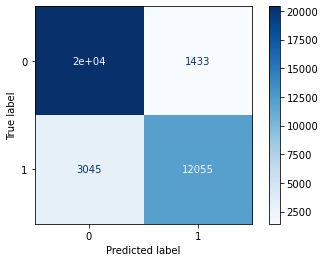

Confusion Matrix Test:


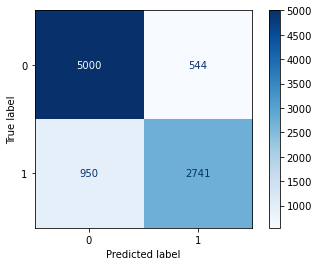

RandomForestClassifier(max_features=10, n_estimators=110)

In [98]:
rforest1 = RandomForestClassifier(max_depth=None, max_features=10, n_estimators=110)
class_model(rforest1, X_train, X_test, y_train, y_test)

Classification report for training data:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     21837
           1       0.90      0.80      0.84     15100

    accuracy                           0.88     36937
   macro avg       0.88      0.87      0.87     36937
weighted avg       0.88      0.88      0.88     36937

Classification report for testing data:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      5544
           1       0.84      0.74      0.79      3691

    accuracy                           0.84      9235
   macro avg       0.84      0.82      0.83      9235
weighted avg       0.84      0.84      0.84      9235

Confusion Matrix Train:


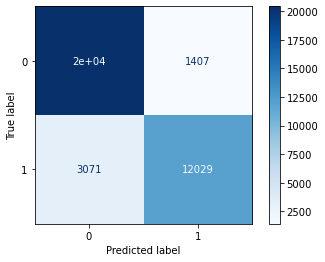

Confusion Matrix Test:


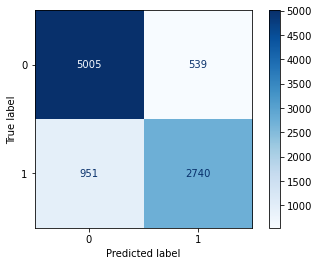

RandomForestClassifier(n_estimators=160)

In [99]:
rforest2 = RandomForestClassifier(max_depth=None, max_features='auto', n_estimators=160)
class_model(rforest2, X_train, X_test, y_train, y_test)

In [74]:
#rf1 is best currently  - maybe continue to tweak parameters? not mush different from vanilla model WHY

In [75]:
#look at feature importnce now 

In [100]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

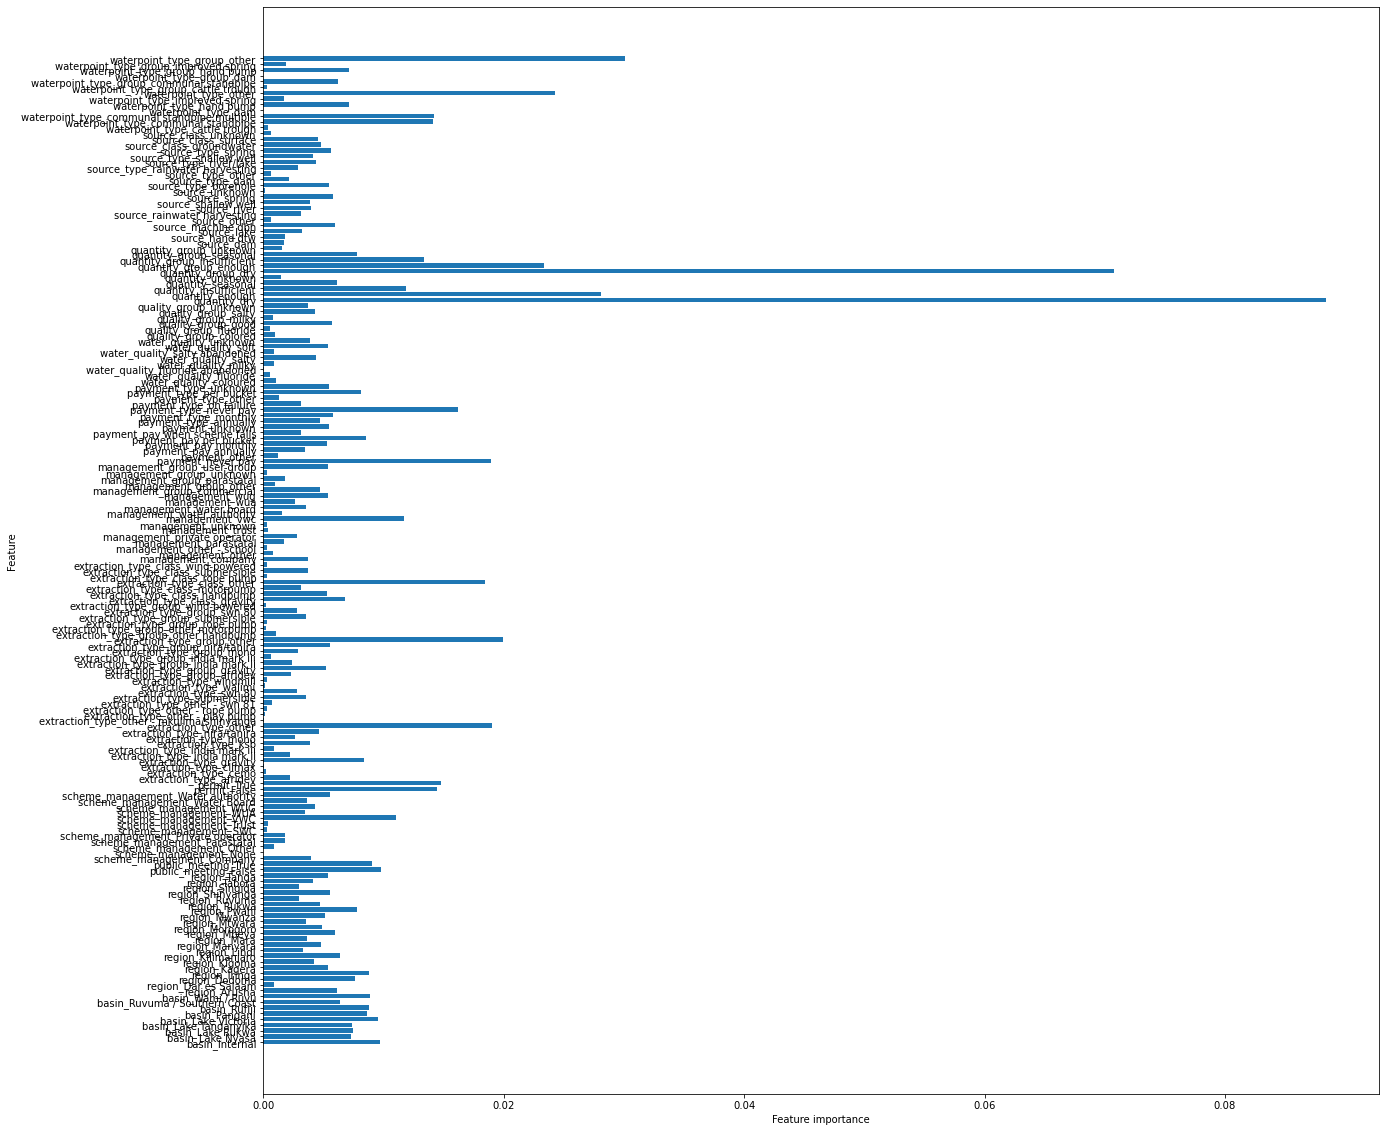

In [101]:
plot_feature_importances(rforest1)

In [102]:
rforest1.feature_importances_.max()

0.0884106427078544

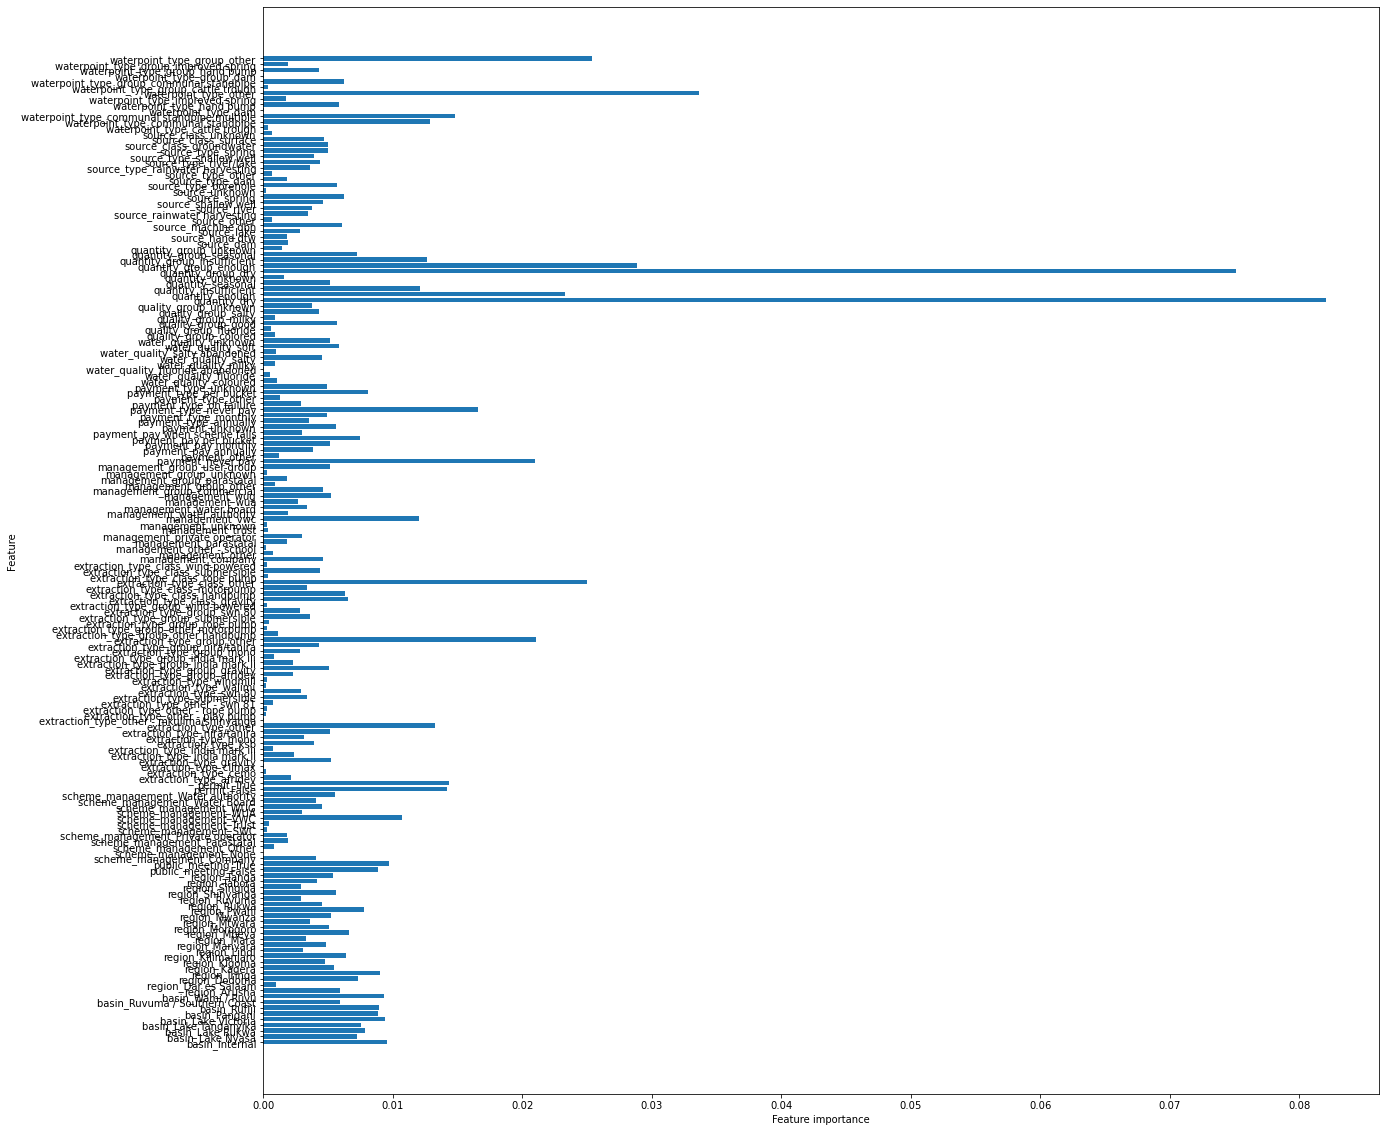

In [103]:
plot_feature_importances(rforest2)

In [141]:
# importance = rforest1.feature_importances_
# importance_df = pd.DataFrame(importance)

In [142]:
# top_10 = importance_df.sort_values(by=0, ascending=False).head(10)

In [143]:
# top_10.index

In [144]:
# X_train.columns[top_10.index]

In [139]:
def get_important_feat(model):
    importance = pd.DataFrame(model.feature_importances_)
    top10 = importance.sort_values(by=0, ascending=False).head(10)
    col_names = X_train.columns[top10.index]
    return col_names

In [140]:
get_important_feat(rforest1)

Index(['quantity_dry', 'quantity_group_dry', 'waterpoint_type_group_other',
       'quantity_enough', 'waterpoint_type_other', 'quantity_group_enough',
       'extraction_type_group_other', 'extraction_type_other',
       'payment_never pay', 'extraction_type_class_other'],
      dtype='object')

In [145]:
get_important_feat(rforest2)

Index(['quantity_dry', 'quantity_group_dry', 'waterpoint_type_other',
       'quantity_group_enough', 'waterpoint_type_group_other',
       'extraction_type_class_other', 'quantity_enough',
       'extraction_type_group_other', 'payment_never pay',
       'payment_type_never pay'],
      dtype='object')